# San Francisco Housing Rental Analysis

In this assignment, you will perform basic analysis for the San Francisco to allow potential real estate investors to choose rental investment properties. 

In [184]:
# initial imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
import plotly.express as px
from pathlib import Path
from panel.interact import interact
import panel as pn

%matplotlib inline
pn.extension('plotly')
pn.extension()

In [185]:
# Read the Mapbox API key
map_box_api = os.getenv("MAPBOX_API_KEY")
px.set_mapbox_access_token(map_box_api)

## Load Data

In [163]:
# Read the census data into a Pandas DataFrame
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data.head()

neighborhood  sale_price_sqr_foot  housing_units  gross_rent
year                                                                  
2010      Alamo Square           291.182945         372560        1239
2010        Anza Vista           267.932583         372560        1239
2010           Bayview           170.098665         372560        1239
2010  Buena Vista Park           347.394919         372560        1239
2010  Central Richmond           319.027623         372560        1239

- - - 

## Housing Units Per Year

In this section, you will calculate the number of housing units per year and visualize the results as a bar chart using the Pandas plot function. 

Hint: Use the Pandas groupby function

Optional challenge: Use the min, max, and std to scale the y limits of the chart.

In [164]:
# Calculate the mean number of housing units per year (hint: use groupby) 
housing_units = sfo_data["housing_units"]
housing_units = housing_units.groupby([sfo_data.index]).mean()
housing_units

year
2010    372560
2011    374507
2012    376454
2013    378401
2014    380348
2015    382295
2016    384242
Name: housing_units, dtype: int64

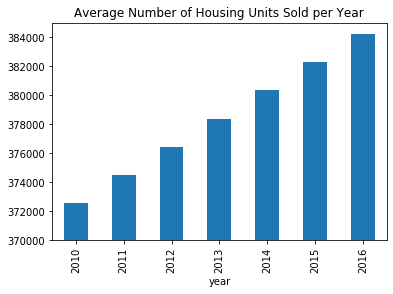

In [167]:
# Use the Pandas plot function to plot the average housing units per year.
# Note: You will need to manually adjust the y limit of the chart using the min and max values from above.

housing_units_plot = housing_units.plot.bar(x='year', ylim=[370000, 385000], title="Average Number of Housing Units Sold per Year")
housing_units_plot

- - - 

## Average Prices per Square Foot

In this section, you will calculate the average gross rent and average sales price for each year. Plot the results as a line chart.

### Average Gross Rent in San Francisco Per Year

In [168]:
# Calculate the average gross rent and average sale price per square foot

average_rent_sqr_foot = sfo_data["gross_rent"].groupby([sfo_data.index]).mean()
average_rent_sqr_foot


year
2010    1239
2011    1530
2012    2324
2013    2971
2014    3528
2015    3739
2016    4390
Name: gross_rent, dtype: int64

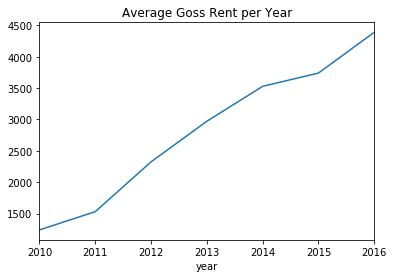

In [169]:
# Plot the Average Gross Rent per Year as a Line Chart 
average_rent_sqr_foot.plot.line(x='year', y='gross_rent', title="Average Goss Rent per Year")

### Average Sales Price per Year

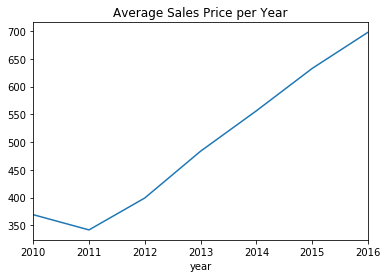

In [170]:
# Plot the Average Sales Price per Year as a line chart
average_price_sqr_foot = sfo_data["sale_price_sqr_foot"].groupby([sfo_data.index]).mean()
average_price_sqr_foot.plot(title="Average Sales Price per Year")

<Figure size 432x288 with 0 Axes>

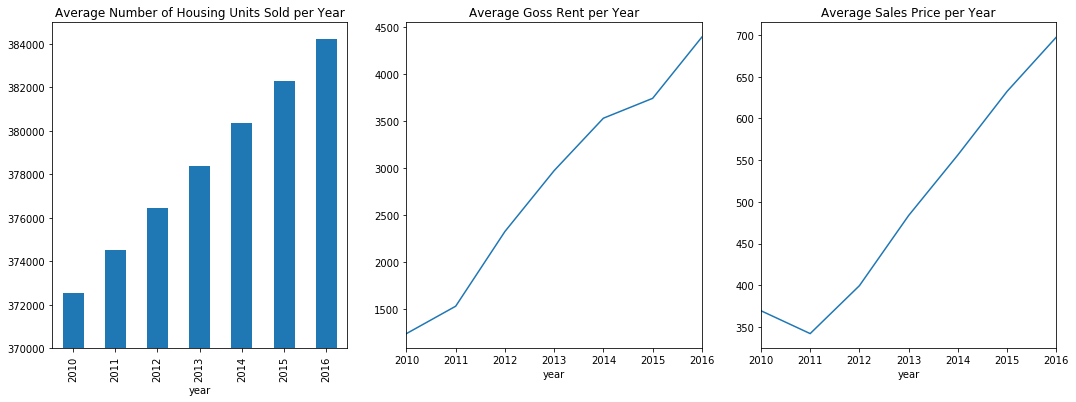

In [171]:
fig = plt.figure()

fig, (ax, ax2, ax3) = plt.subplots(1,3)

units = housing_units.plot.bar(x='year', ylim=[370000, 385000], ax=ax, title="Average Number of Housing Units Sold per Year")

rent = average_rent_sqr_foot.plot.line(x='year', y='gross_rent', ax=ax2, title="Average Goss Rent per Year", figsize=(18,6))

sales = average_price_sqr_foot.plot.line(x='year', y='average_price_sqr_foot', ax=ax3, title="Average Sales Price per Year")



- - - 

## Average Prices by Neighborhood

In this section, you will use hvplot to create an interactive visulization of the Average Prices with a dropdown selector for the neighborhood.

Hint: It will be easier to create a new DataFrame from grouping the data and calculating the mean prices for each year and neighborhood

In [172]:
# Group by year and neighborhood and then create a new dataframe of the mean values
sfo_data_new = sfo_data.groupby([sfo_data.index, "neighborhood"]).mean()
sfo_sales = sfo_data_new["sale_price_sqr_foot"]
sfo_sales_df = pd.DataFrame(sfo_sales).reset_index()
sfo_sales_df.head()

year      neighborhood  sale_price_sqr_foot
0  2010      Alamo Square           291.182945
1  2010        Anza Vista           267.932583
2  2010           Bayview           170.098665
3  2010  Buena Vista Park           347.394919
4  2010  Central Richmond           319.027623

In [175]:
# Use hvplot to create an interactive line chart of the average price per sq ft.
# The plot should have a dropdown selector for the neighborhood
def choose_neighborhood(neighborhood):

    
    
    return sfo_sales_df.loc[sfo_sales_df['neighborhood']==neighborhood,:].hvplot.line(
        x="year",
        y="sale_price_sqr_foot",
        colormap="viridis",
        title="SF Sale per Square foot per Year",
    )

neighborhood_choice = sfo_sales_df["neighborhood"].unique()


# Render plot with Panel interactive widget
interact(choose_neighborhood, neighborhood=neighborhood_choice)

Column
    [0] Column
        [0] Select(name='neighborhood', options=['Alamo Square', ...], value='Alamo Square')
    [1] Row
        [0] HoloViews(Curve, name='interactive02436')

- - - 

## The Top 10 Most Expensive Neighborhoods

In this section, you will need to calculate the mean sale price for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. Plot the results as a bar chart.

In [176]:
#Calculating the mean values per neighborhood 
avg_value_per_neighborhood = sfo_data.groupby([sfo_data["neighborhood"]]).mean()
avg_value_per_neighborhood = avg_value_per_neighborhood.reset_index()
avg_value_per_neighborhood.head()

neighborhood  sale_price_sqr_foot  housing_units   gross_rent
0     Alamo Square           366.020712       378401.0  2817.285714
1       Anza Vista           373.382198       379050.0  3031.833333
2          Bayview           204.588623       376454.0  2318.400000
3  Bayview Heights           590.792839       382295.0  3739.000000
4  Bernal Heights            576.746488       379374.5  3080.333333

In [177]:
# Getting the data from the top 10 expensive neighborhoods

top_10_ex_neighborhood = avg_value_per_neighborhood.nlargest(10, 'sale_price_sqr_foot').reset_index()
top_10_ex_neighborhood

index           neighborhood  sale_price_sqr_foot  housing_units  \
0     65  Union Square District           903.993258      377427.50   
1     36         Merced Heights           788.844818      380348.00   
2     38          Miraloma Park           779.810842      375967.25   
3     51        Pacific Heights           689.555817      378401.00   
4     71          Westwood Park           687.087575      382295.00   
5     63         Telegraph Hill           676.506578      378401.00   
6     57       Presidio Heights           675.350212      378401.00   
7     10             Cow Hollow           665.964042      378401.00   
8     56           Potrero Hill           662.013613      378401.00   
9     60            South Beach           650.124479      375805.00   

    gross_rent  
0  2555.166667  
1  3414.000000  
2  2155.250000  
3  2817.285714  
4  3959.000000  
5  2817.285714  
6  2817.285714  
7  2817.285714  
8  2817.285714  
9  2099.000000

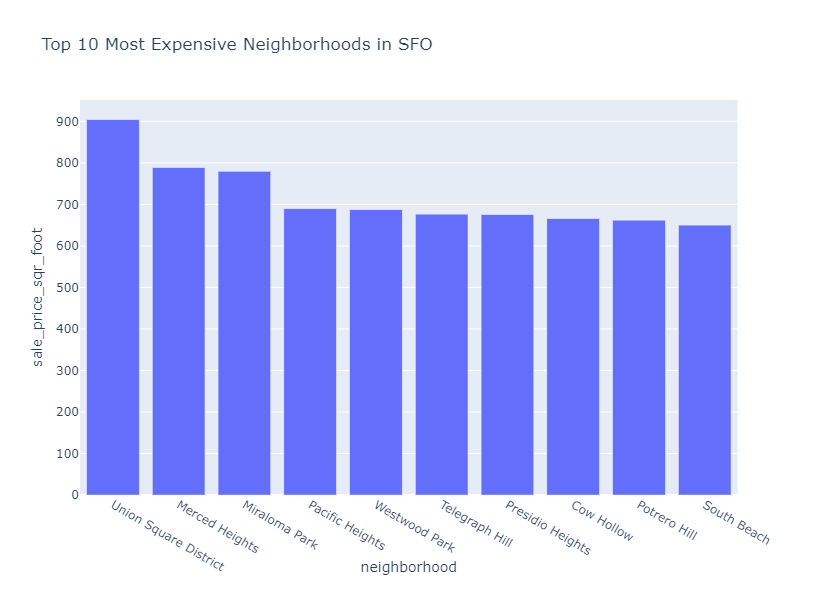

In [178]:
# Plotting the data from the top 10 expensive neighborhoods
px.bar(top_10_ex_neighborhood,
    x="neighborhood", 
    y="sale_price_sqr_foot", 
    title="Top 10 Most Expensive Neighborhoods in SFO", 
   )

- - - 

## Parallel Coordinates and Parallel Categories Analysis

In this section, you will use plotly express to create parallel coordinates and parallel categories visualizations so that investors can interactively filter and explore various factors related to the sales price of the neighborhoods. 

Using the DataFrame of Average values per neighborhood (calculated above), create the following visualizations:
1. Create a Parallel Coordinates Plot
2. Create a Parallel Categories Plot

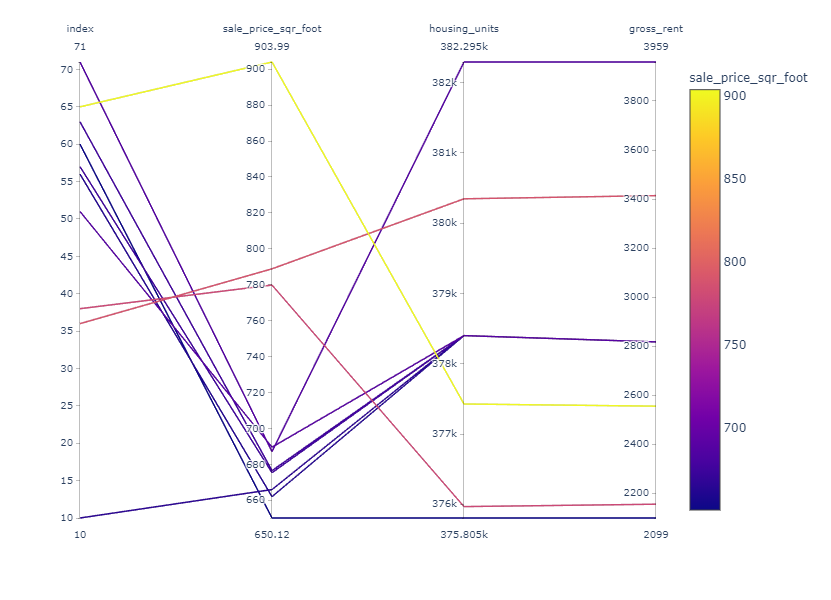

In [179]:
# Parallel Coordinates Plot
px.parallel_coordinates(top_10_ex_neighborhood, color='sale_price_sqr_foot')


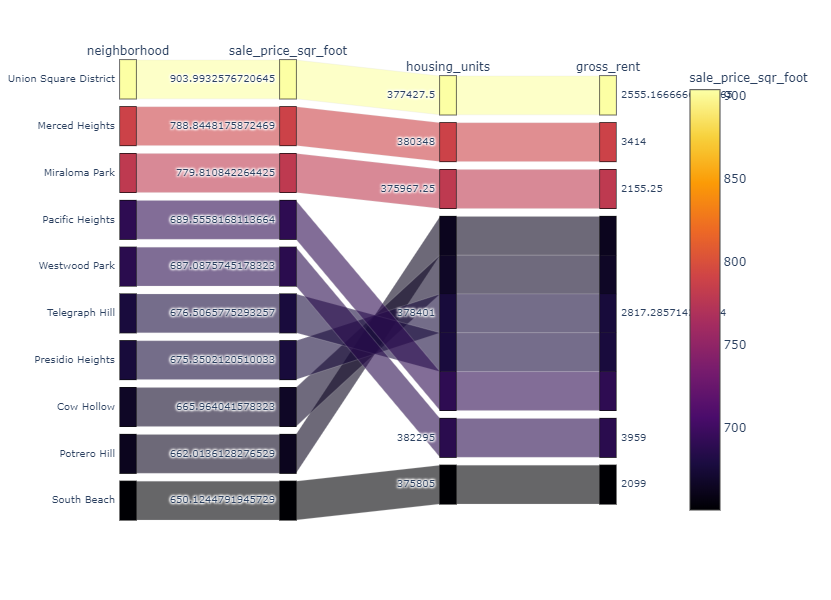

In [180]:
# Parallel Categories Plot
px.parallel_categories(
    top_10_ex_neighborhood,
    dimensions=["neighborhood", "sale_price_sqr_foot", "housing_units", "gross_rent"],
    color="sale_price_sqr_foot",
    color_continuous_scale=px.colors.sequential.Inferno,
)

- - - 

## Neighborhood Map

In this section, you will read in neighboor location data and build an interactive map with the average prices per neighborhood. Use a scatter_mapbox from plotly express to create the visualization. Remember, you will need your mapbox api key for this.

### Load Location Data

In [186]:
# Load neighborhoods coordinates data
file_path = Path("Data/neighborhoods_coordinates.csv")
df_neighborhood_location = pd.read_csv(file_path)


### Data Preparation

You will need to join the location data with the mean prices per neighborhood

1. Calculate the mean values for each neighborhood
2. Join the average values with the neighborhood locations

In [187]:
# Pull the dataframe that calculated average values per neighborhood
# Join the average values with the neighborhood locations
avg_value_location = pd.concat([avg_value_per_neighborhood, df_neighborhood_location], axis="columns", join="inner")
avg_value_location.head()


neighborhood  sale_price_sqr_foot  housing_units   gross_rent  \
0     Alamo Square           366.020712       378401.0  2817.285714   
1       Anza Vista           373.382198       379050.0  3031.833333   
2          Bayview           204.588623       376454.0  2318.400000   
3  Bayview Heights           590.792839       382295.0  3739.000000   
4  Bernal Heights            576.746488       379374.5  3080.333333   

      Neighborhood        Lat         Lon  
0     Alamo Square  37.791012 -122.402100  
1       Anza Vista  37.779598 -122.443451  
2          Bayview  37.734670 -122.401060  
3  Bayview Heights  37.728740 -122.410980  
4   Bernal Heights  37.728630 -122.443050

### Mapbox Visualization

Plot the aveage values per neighborhood with a plotly express scatter_mapbox visualization.

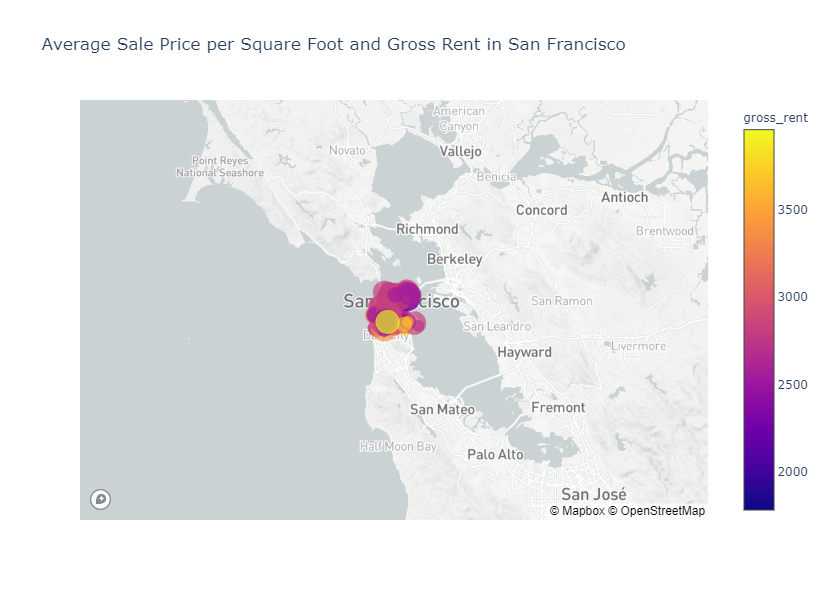

In [188]:
# Create a scatter mapbox to analyze neighborhood info

px.scatter_mapbox(
    avg_value_location,
    lat="Lat",
    lon="Lon",
    size="sale_price_sqr_foot",
    color="gross_rent",
    title="Average Sale Price per Square Foot and Gross Rent in San Francisco"
)

